<a href="https://colab.research.google.com/github/dennissrn/EntregaTrab/blob/master/GastosDeputados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos dados da Câmara dos Deputados


A Câmara dos Deputados possui um serviço de dados abertos desde 2006, que foi lançada com o nome de "SIT Câmara". Com a promulgação da "Lei de Acesso à Informação", o cadastro deixou de ser necessário e os dados estão disponíveis no site da Câmara nomeado [Dados Abertos](https://dadosabertos.camara.leg.br).

![texto alternativo](https://cdn.domtotal.com/img/noticias/2020-01/1419361_434615.jpg)




In [5]:
import pandas as pd
import matplotlib as plt

deputados = pd.read_csv("Ano-2020.csv",sep = ";", encoding='UTF-8')

In [ ]:
# It's 68876 rows and 31 columns
deputados.shape

(6072, 31)

- A tabela tem 68876 linhas e 31 colunas.

In [ ]:
# See columns
deputados.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

- Retornando o nome de todas as colunas, para sabermos com o que iremos trabalhar.

In [6]:
# Visualize first rows
deputados.head(10)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,LINEAR COMUNICACAO LTDA - EPP,109.472.430/0019-5,2737,4,2020-04-27T00:00:00,1527.28,0.0,1527.28,4,2020,0,NaN,NaN,1693866,NaN,NaN,2713,7050172,http://camara.leg.br/cota-parlamentar/nota-fis...
1,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,LINEAR COMUNICACAO LTDA - EPP,109.472.430/0019-5,2764,4,2020-05-27T00:00:00,1527.28,0.0,1527.28,5,2020,0,NaN,NaN,1698547,NaN,NaN,2713,7058437,http://camara.leg.br/cota-parlamentar/nota-fis...
2,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,LINEAR COMUNICACAO LTDA - EPP,109.472.430/0019-5,2809,4,2020-07-27T00:00:00,1527.28,0.0,1527.28,7,2020,0,NaN,NaN,1709149,NaN,NaN,2713,7078508,http://camara.leg.br/cota-parlamentar/nota-fis...
3,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,LINEAR COMUNICACAO LTDA - EPP,109.472.430/0019-5,2786,4,2020-06-26T00:00:00,1527.28,0.0,1527.28,6,2020,0,NaN,NaN,1703569,NaN,NaN,2713,7067718,http://camara.leg.br/cota-parlamentar/nota-fis...
4,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,0,NaN,"DIGITAL RIVER IRELAND, LTD.",000.000.000/0001-0,45375674408,1,2020-02-19T00:00:00,613.61,0.0,613.61,2,2020,0,NaN,NaN,1692485,NaN,NaN,2713,7047615,NaN
5,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,0,NaN,LINEAR COMUNICACAO LTDA - EPP,109.472.430/0019-5,2714,4,2020-03-26T00:00:00,1527.28,0.0,1527.28,3,2020,0,NaN,NaN,1689241,NaN,NaN,2713,7042111,http://camara.leg.br/cota-parlamentar/nota-fis...
6,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,228.362.100/0015-7,66,4,2020-07-10T00:00:00,98.80,0.0,98.80,7,2020,0,NaN,NaN,1705435,NaN,NaN,2713,7071059,http://camara.leg.br/cota-parlamentar/nota-fis...
7,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,PAPRICA BURGER COMERCIO DE ALIMENTOS LTDA,261.992.490/0016-1,307506,4,2020-07-10T00:00:00,318.00,0.0,318.00,7,2020,0,NaN,NaN,1705374,NaN,NaN,2713,7070958,http://camara.leg.br/cota-parlamentar/nota-fis...
8,DEM,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,SHOIO COMERCIO DE ALIMENTOS LTDA,281.202.680/0018-6,21494,4,2020-07-06T00:00:00,184.45,0.0,184.45,7,2020,0,NaN,NaN,1705364,NaN,NaN,2713,7070935,http://camara.leg.br/cota-parlamentar/nota-fis...
9,LIDERANÇA DO PSDB,NaN,NaN,NaN,2019,NaN,NaN,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,POSTO DA TORRE EIRELI - EPP,044.731.930/0015-9,298526,4,2020-03-10T00:00:00,110.86,0.0,110.86,3,2020,0,NaN,NaN,1684228,NaN,NaN,2442,7031734,http://camara.leg.br/cota-parlamentar/nota-fis...


In [7]:
deputados.tail(10)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
68866,Carla Dickson,2.336272e+09,213762.0,557.0,2019,RN,PROS,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO GOLDEN GAS 202 LTDA,308.801.120/0014-5,97068,4,2020-07-22T00:00:00,212.91,0.00,212.91,7,2020,0,NaN,NaN,1708929,NaN,NaN,3468,7078106,http://camara.leg.br/cota-parlamentar/nota-fis...
68867,Carla Dickson,2.336272e+09,213762.0,557.0,2019,RN,PROS,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO SHOPPING QL 06 COMERCIO DE DERIV DE PETRO...,006.474.400/0013-5,15253,4,2020-07-13T00:00:00,124.97,0.00,124.97,7,2020,0,NaN,NaN,1705845,NaN,NaN,3468,7071968,http://camara.leg.br/cota-parlamentar/nota-fis...
68868,Carla Dickson,2.336272e+09,213762.0,557.0,2019,RN,PROS,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0761-4,699686,4,2020-07-28T00:00:00,100.00,0.00,100.00,7,2020,0,NaN,NaN,1708929,NaN,NaN,3468,7078097,http://camara.leg.br/cota-parlamentar/nota-fis...
68869,Carla Dickson,2.336272e+09,213762.0,557.0,2019,RN,PROS,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,GOES COMBUSTIVEIS LUBRIRICANTES E GLP LTDA,054.543.900/0019-3,248673,4,2020-07-16T00:00:00,157.51,0.00,157.51,7,2020,0,NaN,NaN,1708929,NaN,NaN,3468,7078112,http://camara.leg.br/cota-parlamentar/nota-fis...
68870,Carla Dickson,2.336272e+09,213762.0,557.0,2019,RN,PROS,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,DUARTE & GONTIJO ADVOGADOS ASSOCIADOS,267.028.310/0010-7,55,4,2020-07-07T00:00:00,5000.00,0.00,5000.00,6,2020,0,NaN,NaN,1704770,NaN,NaN,3468,7069959,http://camara.leg.br/cota-parlamentar/nota-fis...
68871,Carla Dickson,2.336272e+09,213762.0,557.0,2019,RN,PROS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,DESTA TECNOLOGIA DA INFORMACAO,356.997.160/0010-3,0000000019,0,2020-07-06T00:00:00,7000.00,0.00,7000.00,6,2020,0,NaN,NaN,1704731,NaN,NaN,3468,7069864,https://www.camara.leg.br/cota-parlamentar/doc...
68872,Carla Dickson,2.336272e+09,213762.0,557.0,2019,RN,PROS,56,8,SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...,0,NaN,ATIVA SISTEMAS ELETRÔNICOS,140.458.360/0011-7,0000002839,0,2020-07-01T00:00:00,460.00,245.33,214.67,6,2020,0,NaN,NaN,1706858,NaN,NaN,3468,7073871,https://www.camara.leg.br/cota-parlamentar/doc...
68873,Carla Dickson,2.336272e+09,213762.0,557.0,2019,RN,PROS,56,11,SERVIÇOS POSTAIS,0,NaN,CORREIOS - SEDEX CONVENCIONAL,000.000.000/0000-7,RSP : 2306608,1,2020-07-17T15:20:51,227.87,0.00,227.87,7,2020,0,NaN,NaN,0,0.0,NaN,3468,0,NaN
68874,Deuzinho Filho,5.024395e+10,213856.0,559.0,2019,CE,REPUBLICANOS,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,003.065.970/0710-0,1139625,4,2020-07-07T00:00:00,100.00,0.00,100.00,7,2020,0,NaN,NaN,1705824,NaN,NaN,3469,7070337,http://camara.leg.br/cota-parlamentar/nota-fis...
68875,Deuzinho Filho,5.024395e+10,213856.0,559.0,2019,CE,REPUBLICANOS,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",0,NaN,ARAUJO E NOVAES ADVOGADOS ASSOCIADOS,240.696.960/0017-0,431,4,2020-07-20T00:00:00,8000.00,0.00,8000.00,7,2020,0,NaN,NaN,1707426,NaN,NaN,3469,7075076,http://camara.leg.br/cota-parlamentar/nota-fis...


- Pelo que parece temos linhas representando exclusivamente o nome do partido.
- Têm colunas com NaN.

In [ ]:
deputados.groupby(['txNomeParlamentar']).size()

txNomeParlamentar
Alice Portugal         78
Angela Amin           112
Arlindo Chinaglia     133
Bacelar                72
Benedita da Silva     112
                     ... 
Vander Loubet         184
Vicentinho            133
Wellington Roberto    110
Wilson Santiago       150
Átila Lins             43
Length: 68, dtype: int64

- Aparentemente, embora as primeiras linhas não estejam relacionadas aos nomes dos deputados, a maioria está.

In [ ]:
deputados.isnull().sum()

txNomeParlamentar               0
cpf                           228
ideCadastro                   228
nuCarteiraParlamentar         228
nuLegislatura                   0
sgUF                          228
sgPartido                     228
codLegislatura                  0
numSubCota                      0
txtDescricao                    0
numEspecificacaoSubCota         0
txtDescricaoEspecificacao    4634
txtFornecedor                   1
txtCNPJCPF                      0
txtNumero                       0
indTipoDocumento                0
datEmissao                    156
vlrDocumento                    0
vlrGlosa                        0
vlrLiquido                      1
numMes                          1
numAno                          1
numParcela                      1
txtPassageiro                5692
txtTrecho                    5704
numLote                         1
numRessarcimento             4932
vlrRestituicao               6071
nuDeputadoId                    1
ideDocumento  

- Os dados relacionados aos deputados começam na linha de número 228, se os campos com NANs em cpf acabam em 227.

In [74]:
deputados2 = deputados.iloc[228:6072,:]
deputados2.head

<bound method NDFrame.head of      txNomeParlamentar  ...                                       urlDocumento
228       Danilo Forte  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
229       Danilo Forte  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
230       Danilo Forte  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
231       Danilo Forte  ...  https://www.camara.leg.br/cota-parlamentar/doc...
232       Danilo Forte  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
...                ...  ...                                                ...
6067  Gonzaga Patriota  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
6068  Gonzaga Patriota  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
6069  Gonzaga Patriota  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
6070  Gonzaga Patriota  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
6071  Gonzaga Patriota  ...  http://camara.leg.br/cota-parlamentar/nota-fis...

[5844 rows x 31 colum

In [115]:
deputados2 = deputados2[["txNomeParlamentar","vlrLiquido","vlrRestituicao","sgPartido"]]
agrupado = deputados2.groupby(["txNomeParlamentar","sgPartido"]).sum()
print(agrupado)

                                  vlrLiquido  vlrRestituicao
txNomeParlamentar   sgPartido                               
Alice Portugal      PCdoB          178125.94            0.00
Angela Amin         PP             164847.85            0.00
Arlindo Chinaglia   PT              62039.64            0.00
Bacelar             PODE           159836.30            0.00
Benedita da Silva   PT             126587.52            0.00
Bosco Costa         PL              92679.40            0.00
Carlos Sampaio      PSDB            72037.61         1272.32
Celso Russomanno    REPUBLICANOS    32618.46            0.00
Daniel Almeida      PCdoB          247661.45            0.00
Danilo Forte        PSDB            21247.42            0.00
Darcísio Perondi    MDB             46810.39            0.00
Elcione Barbalho    MDB             42169.92            0.00
Fausto Pinato       PP              77308.30            0.00
Felipe Carreras     PSB                35.68            0.00
Fábio Henrique      PDT 

In [120]:
agrupado.describe()

,vlrLiquido,vlrRestituicao
count,56.000000,56.000000
mean,126378.243571,22.720000
std,66682.194694,170.020912
min,35.680000,0.000000
25%,75188.810000,0.000000
50%,134494.290000,0.000000
75%,168134.725000,0.000000
max,275948.750000,1272.320000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7670932390>]],
      dtype=object)

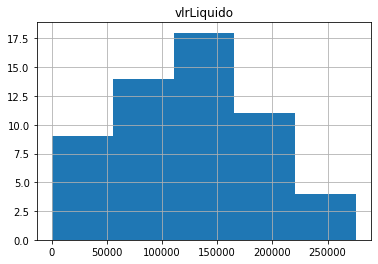

In [118]:
agrupado.hist("vlrLiquido", bins = 5)

In [79]:
deputados3 = deputados.iloc[:228,:]
deputados3.head

<bound method NDFrame.head of     txNomeParlamentar  ...                                       urlDocumento
0                 DEM  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
1                 DEM  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
2                 DEM  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
3                 DEM  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
4                 DEM  ...                                                NaN
..                ...  ...                                                ...
223               SDD  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
224               SDD  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
225               SDD  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
226               SDD  ...  http://camara.leg.br/cota-parlamentar/nota-fis...
227               SDD  ...  http://camara.leg.br/cota-parlamentar/nota-fis...

[228 rows x 31 columns]>

In [111]:
deputados3 = deputados3[["txNomeParlamentar","vlrLiquido","vlrRestituicao","sgPartido"]]
agrupado = deputados3.groupby(["txNomeParlamentar"]).sum().sort_values(["vlrLiquido"], ascending = False)
print(agrupado)

                   vlrLiquido  vlrRestituicao
txNomeParlamentar                            
LIDERANÇA DO PT      69367.09             0.0
PDT                  60450.00             0.0
PROS                 35577.26             0.0
PODE                 16150.96             0.0
PP                   16000.00             0.0
LIDERANÇA DO PSDB    15235.01             0.0
PTB                  14255.84             0.0
SDD                  10098.49             0.0
DEM                   8851.26             0.0
PSD                   8476.01             0.0
NOVO                  6349.36             0.0
LIDMIN                5221.35             0.0


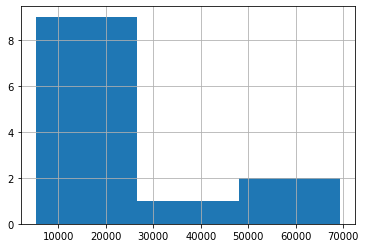

In [113]:
agrupado["vlrLiquido"].hist(bins=3)

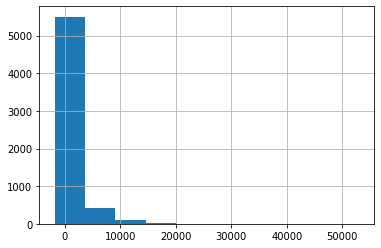

In [ ]:
deputados['vlrLiquido'].hist()

- Pelo histograma, percebemos que de fato existe uma concentração do valor líquido no começo, o que é mais um índicio que os dados estão ordenados de forma que os dados dos deputados aparecem apenas depois de informações relacionadas aos partidos.

In [ ]:
deputados.columns


Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [ ]:
deputados.iloc[228,:]

txNomeParlamentar                                                 Danilo Forte
cpf                                                                1.21337e+10
ideCadastro                                                              62881
nuCarteiraParlamentar                                                      558
nuLegislatura                                                             2019
sgUF                                                                        CE
sgPartido                                                                 PSDB
codLegislatura                                                              56
numSubCota                                                                   1
txtDescricao                 MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...
numEspecificacaoSubCota                                                      0
txtDescricaoEspecificacao                                                  NaN
txtFornecedor                        Kalunga Comerci

In [ ]:
# Show how many rows by group
deputados.groupby('txNomeParlamentar').size()

txNomeParlamentar
AJ Albuquerque     85
Abou Anni         287
Abílio Santana    179
Acácio Favacho     90
Adolfo Viana       74
                 ... 
Zé Silva          185
Zé Vitor          188
Átila Lins         43
Átila Lira         37
Áurea Carolina     99
Length: 543, dtype: int64

In [ ]:
gastos = deputados[['txNomeParlamentar','vlrLiquido','sgPartido']].groupby(['txNomeParlamentar','sgPartido'])
gastos.sum()

,,vlrLiquido
txNomeParlamentar,sgPartido,
AJ Albuquerque,PP,185519.97
Abou Anni,PSL,127050.33
Abílio Santana,PL,221966.05
Acácio Favacho,PROS,266257.87
Adolfo Viana,PSDB,162231.38
...,...,...
Zé Silva,SOLIDARIEDADE,169638.65
Zé Vitor,PL,178249.35
Átila Lins,PP,64642.09


In [ ]:
deputados['vlrLiquido'].describe()

count    68876.000000
mean      1056.689447
std       2567.532667
min      -3297.760000
25%         66.950000
50%        184.955000
75%        650.000000
max      57500.000000
Name: vlrLiquido, dtype: float64

In [ ]:
plt.boxploat()

AttributeError: ignored

In [ ]:
deputados.groupby('sgPartido').size()

sgPartido
AVANTE            965
CIDADANIA        1226
DEM              3056
MDB              4682
NOVO              818
PATRIOTA          960
PCdoB             837
PDT              3427
PL               5058
PODE             1376
PP               5251
PROS             1082
PSB              4048
PSC               769
PSD              4346
PSDB             4453
PSL              9948
PSOL              951
PT               8415
PTB              1441
PV                367
REDE               78
REPUBLICANOS     3530
SOLIDARIEDADE    1564
dtype: int64